1- Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

2- Load and Preprocess Dataset.

In [2]:
dataset = pd.read_csv("Housing.csv")

features = dataset.drop(columns=['price'])
target = dataset['price']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

numeric_features_train = features_train.select_dtypes(include=[np.number])
numeric_features_test = features_test.select_dtypes(include=[np.number])

features_train_normalized = (numeric_features_train - numeric_features_train.mean()) / numeric_features_train.std()
features_test_normalized = (numeric_features_test - numeric_features_train.mean()) / numeric_features_train.std()

3- Implement the Simple Trick.

In [3]:
class SimpleTrickLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.coefficients = np.zeros(num_features) 
        self.intercept = 0  

        for _ in range(self.iterations):
            predictions = np.dot(X, self.coefficients) + self.intercept  
            errors = predictions - y  

            for j in range(num_features):
                self.coefficients[j] -= self.learning_rate * np.mean(errors * X[:, j])
            self.intercept -= self.learning_rate * np.mean(errors)

    def predict(self, X):
        return np.dot(X, self.coefficients) + self.intercept

4- Train and Evaluate the Simple Trick Model.

In [4]:
simple_trick_model = SimpleTrickLinearRegression(learning_rate=0.01, iterations=1000)
simple_trick_model.fit(features_train_normalized.values, target_train.values)

target_predictions_simple = simple_trick_model.predict(features_test_normalized.values)

rmse_simple = np.sqrt(mean_squared_error(target_test, target_predictions_simple))
r2_simple = r2_score(target_test, target_predictions_simple)

print("Simple Trick Linear Regression RMSE:", rmse_simple)
print("Simple Trick Linear Regression R^2:", r2_simple)

Simple Trick Linear Regression RMSE: 1514205.0834351869
Simple Trick Linear Regression R^2: 0.5463873439384421


5- Visualize Results.

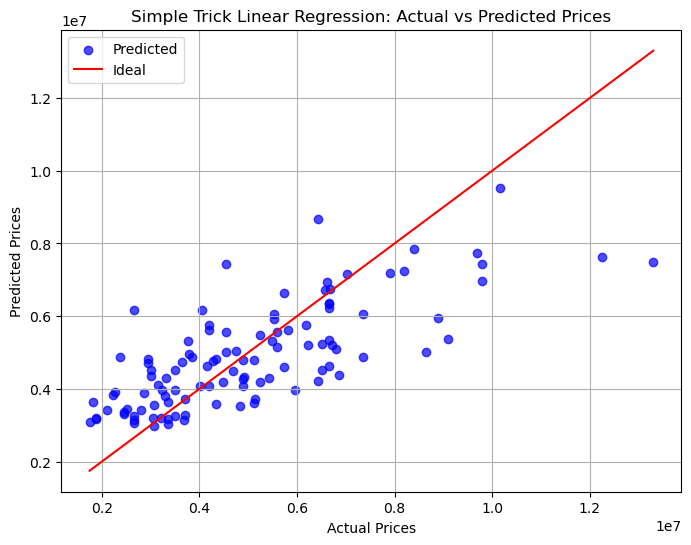

In [6]:
# Scatter plot: Actual vs Predicted with Ideal Line
plt.figure(figsize=(8, 6))
plt.scatter(target_test, target_predictions_simple, color='blue', label='Predicted', alpha=0.7)
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red', label='Ideal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Simple Trick Linear Regression: Actual vs Predicted Prices")
plt.legend()
plt.grid()
plt.show()